<a href="https://colab.research.google.com/github/hariprasathdev007/smart-healthcare-monitoring-system/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

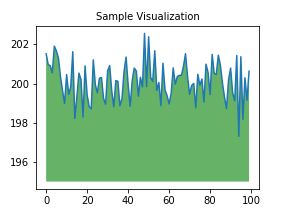

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

In [ ]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# STEP 2: Generate Sample Dataset
np.random.seed(42)
n = 100

data = {
    'Timestamp': [datetime.now() - timedelta(minutes=5*i) for i in range(n)][::-1],
    'Heart_Rate': np.random.randint(65, 110, size=n),
    'SpO2': np.random.randint(90, 100, size=n),
    'Temperature': np.random.normal(36.8, 0.5, size=n).round(1),
}

# Add health status based on rules
def health_status(hr, spo2, temp):
    if hr > 100 or spo2 < 94 or temp > 37.5:
        return 'Abnormal'
    else:
        return 'Normal'

data['Health_Status'] = [health_status(hr, spo2, temp)
                         for hr, spo2, temp in zip(data['Heart_Rate'], data['SpO2'], data['Temperature'])]

df = pd.DataFrame(data)

# STEP 3: View Dataset
df.head()


,Timestamp,Heart_Rate,SpO2,Temperature,Health_Status
0,2025-06-15 09:33:15.849683,103,97,37.4,Abnormal
1,2025-06-15 09:38:15.849681,93,92,37.2,Abnormal
2,2025-06-15 09:43:15.849679,79,92,37.2,Abnormal
3,2025-06-15 09:48:15.849678,107,90,36.3,Abnormal
4,2025-06-15 09:53:15.849675,72,94,37.5,Normal


In [ ]:
# Dataset Info
df.info()

# Descriptive Stats
df.describe()

# Missing Values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Timestamp      100 non-null    datetime64[ns]
 1   Heart_Rate     100 non-null    int64         
 2   SpO2           100 non-null    int64         
 3   Temperature    100 non-null    float64       
 4   Health_Status  100 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ KB
Timestamp        0
Heart_Rate       0
SpO2             0
Temperature      0
Health_Status    0
dtype: int64


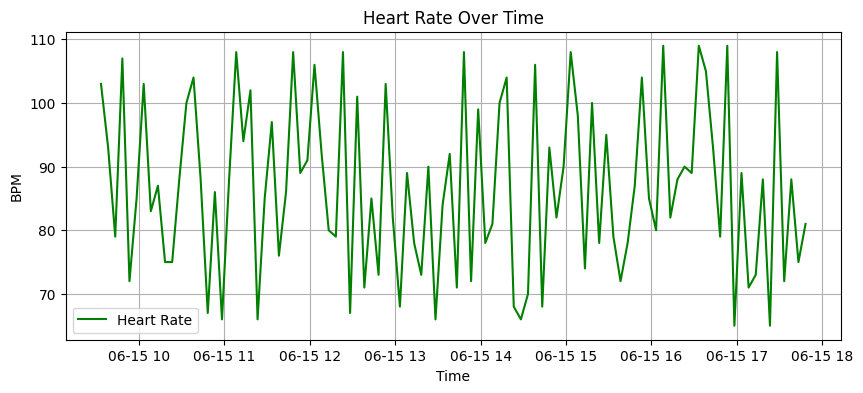

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(df['Timestamp'], df['Heart_Rate'], label='Heart Rate', color='green')
plt.title("Heart Rate Over Time")
plt.xlabel("Time")
plt.ylabel("BPM")
plt.grid()
plt.legend()
plt.show()

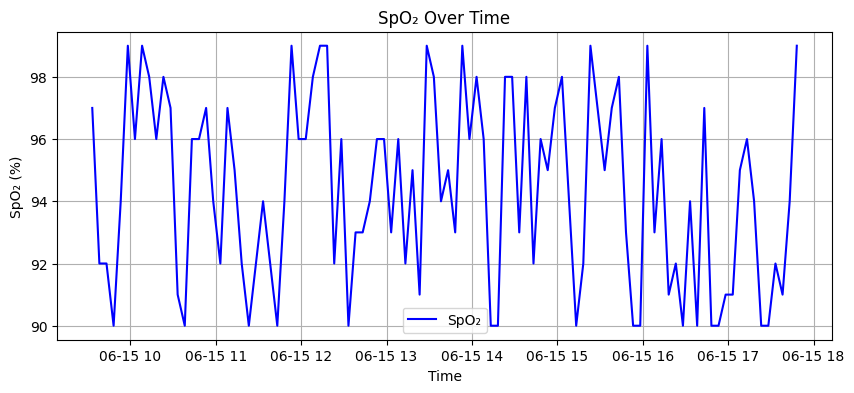

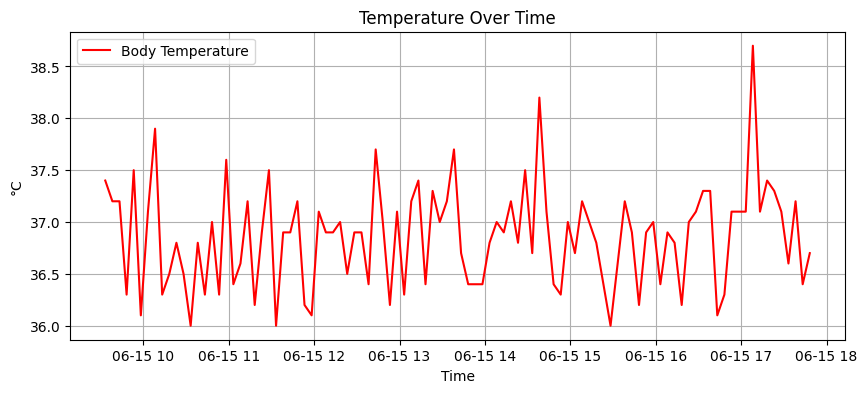

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(df['Timestamp'], df['SpO2'], label='SpO₂', color='blue')
plt.title("SpO₂ Over Time")
plt.xlabel("Time")
plt.ylabel("SpO₂ (%)")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(df['Timestamp'], df['Temperature'], label='Body Temperature', color='red')
plt.title("Temperature Over Time")
plt.xlabel("Time")
plt.ylabel("°C")
plt.grid()
plt.legend()
plt.show()

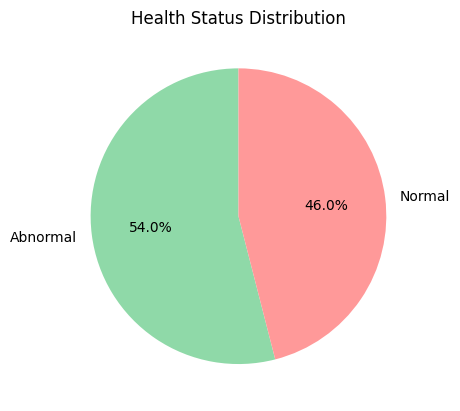

In [ ]:
df['Health_Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#8fd9a8', '#ff9999'])
plt.title('Health Status Distribution')
plt.ylabel('')
plt.show()


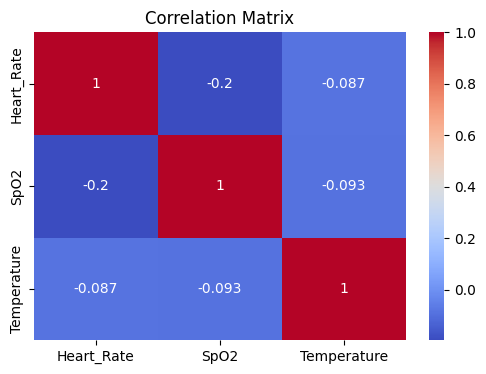

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Heart_Rate', 'SpO2', 'Temperature']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


<ipython-input-10-2969430694>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_df, x='Parameter', y='Average', palette='Set2')


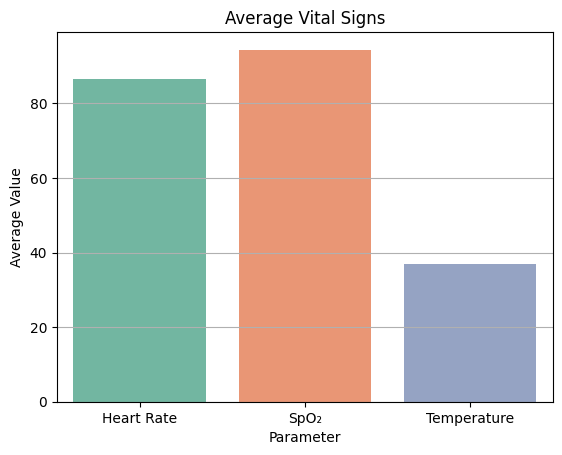

In [ ]:
avg_data = {
    'Parameter': ['Heart Rate', 'SpO₂', 'Temperature'],
    'Average': [df['Heart_Rate'].mean(), df['SpO2'].mean(), df['Temperature'].mean()]
}
avg_df = pd.DataFrame(avg_data)

sns.barplot(data=avg_df, x='Parameter', y='Average', palette='Set2')
plt.title('Average Vital Signs')
plt.ylabel('Average Value')
plt.grid(axis='y')
plt.show()


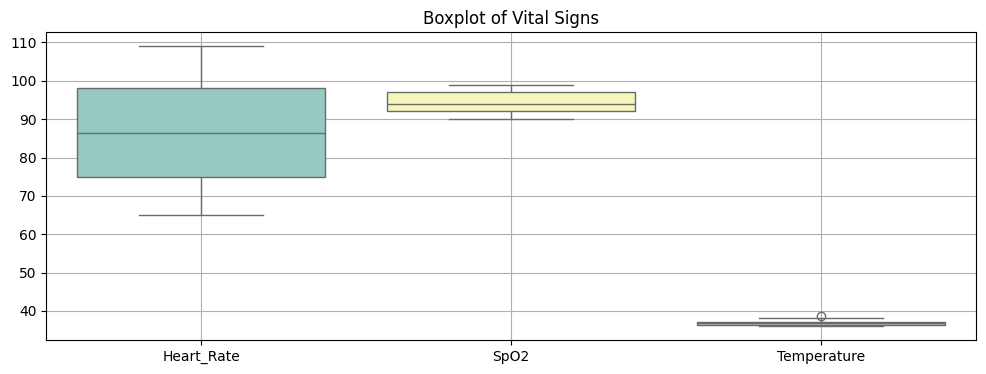

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=df[['Heart_Rate', 'SpO2', 'Temperature']], palette='Set3')
plt.title('Boxplot of Vital Signs')
plt.grid(True)
plt.show()


<ipython-input-13-1379280170>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Health_Status', y='Heart_Rate', palette='coolwarm')


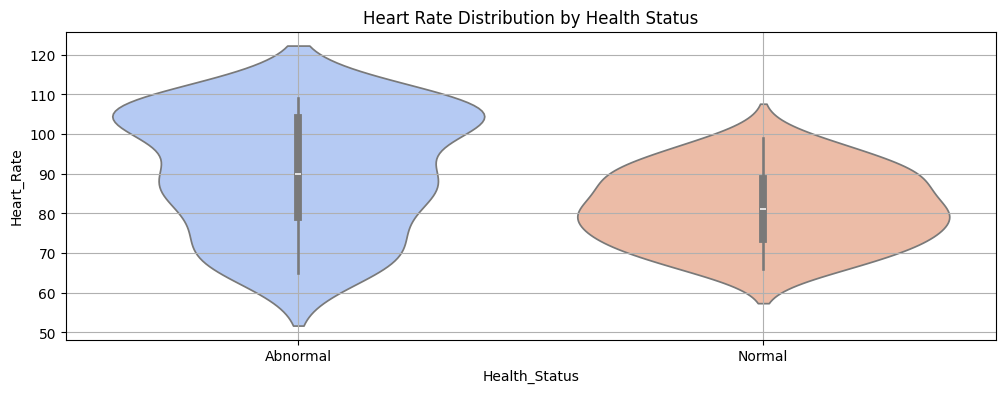

<ipython-input-13-1379280170>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Health_Status', y='SpO2', palette='coolwarm')


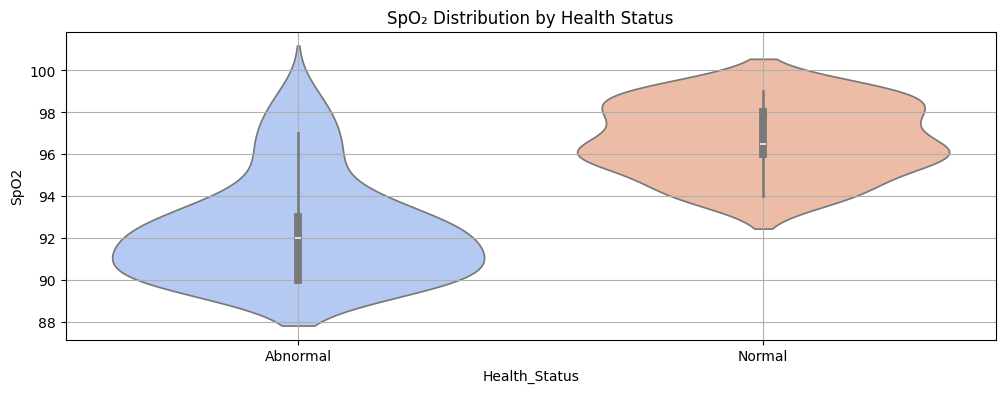

In [ ]:
plt.figure(figsize=(12, 4))
sns.violinplot(data=df, x='Health_Status', y='Heart_Rate', palette='coolwarm')
plt.title('Heart Rate Distribution by Health Status')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))
sns.violinplot(data=df, x='Health_Status', y='SpO2', palette='coolwarm')
plt.title('SpO₂ Distribution by Health Status')
plt.grid(True)
plt.show()


In [ ]:
sns.pairplot(df[['Heart_Rate', 'SpO2', 'Temperature', 'Health_Status']], hue='Health_Status', palette='Set1')
plt.suptitle('Pair Plot of Vital Signs', y=1.02)
plt.show()


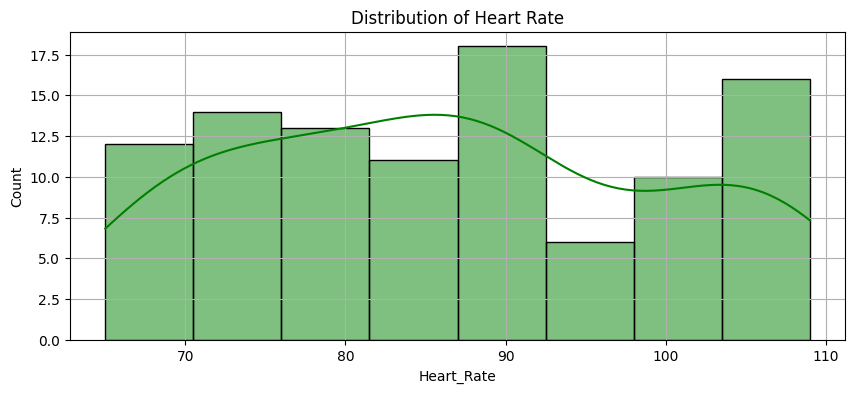

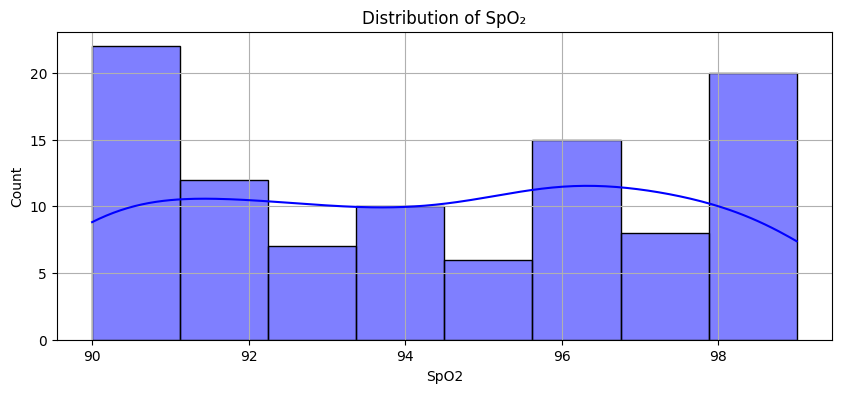

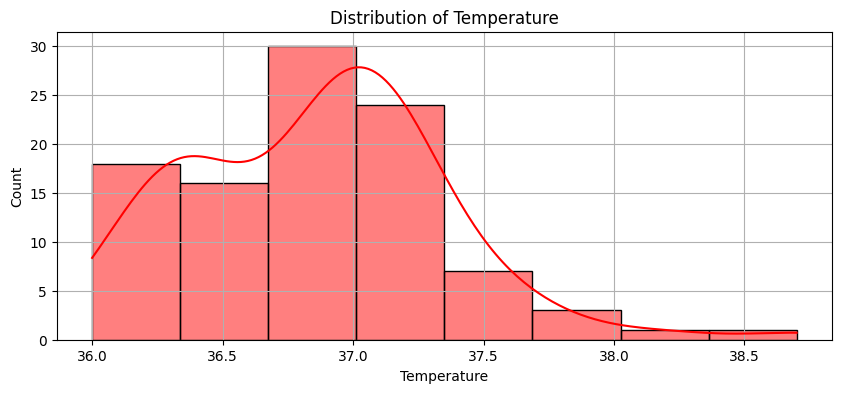

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Heart_Rate'], kde=True, color='green')
plt.title('Distribution of Heart Rate')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df['SpO2'], kde=True, color='blue')
plt.title('Distribution of SpO₂')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df['Temperature'], kde=True, color='red')
plt.title('Distribution of Temperature')
plt.grid(True)
plt.show()


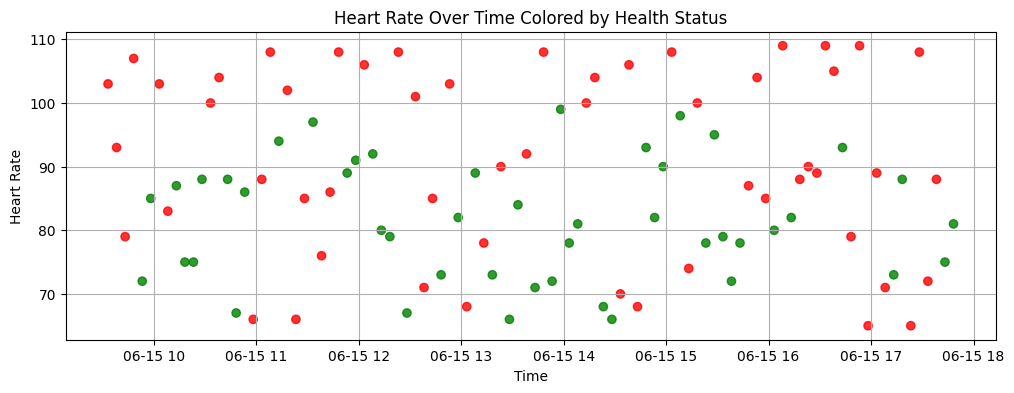

In [ ]:
plt.figure(figsize=(12, 4))
color_map = {'Normal': 'green', 'Abnormal': 'red'}
colors = df['Health_Status'].map(color_map)
plt.scatter(df['Timestamp'], df['Heart_Rate'], c=colors, alpha=0.8)
plt.title('Heart Rate Over Time Colored by Health Status')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()


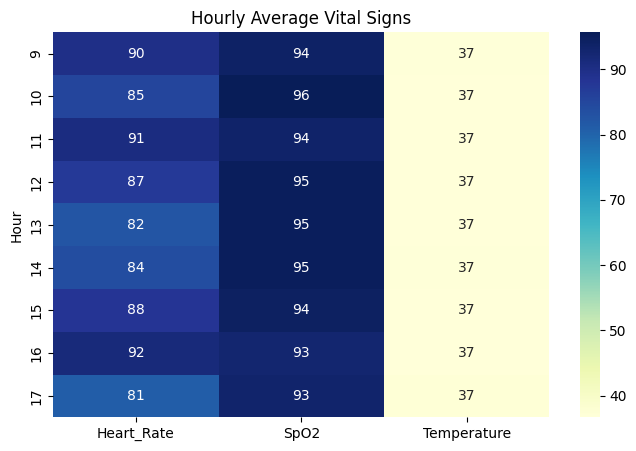

In [ ]:
df['Hour'] = df['Timestamp'].dt.hour
hourly_avg = df.groupby('Hour')[['Heart_Rate', 'SpO2', 'Temperature']].mean().round(2)

plt.figure(figsize=(8, 5))
sns.heatmap(hourly_avg, annot=True, cmap='YlGnBu')
plt.title('Hourly Average Vital Signs')
plt.show()


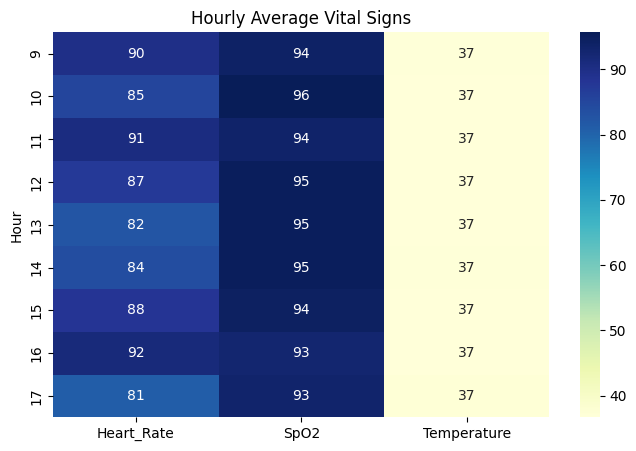

In [ ]:
df['Hour'] = df['Timestamp'].dt.hour
hourly_avg = df.groupby('Hour')[['Heart_Rate', 'SpO2', 'Temperature']].mean().round(2)

plt.figure(figsize=(8, 5))
sns.heatmap(hourly_avg, annot=True, cmap='YlGnBu')
plt.title('Hourly Average Vital Signs')
plt.show()
